## CameronData.ipynb, Cameron's debris-cover DDF results
### Mike Loso, Updated 12/11/2021

This code imports data I digitized from Cameron Markovsky's poster (using https://apps.automeris.io), the saved as an excel file, and plotted to reconstruct his melt curve for debris. It uses data collected on Kennicott Glacier in 2020.

I chose a negative exponential equation with no fitted constant parameter that would set a minimum melt factor on thick debris. One could choose to add that parameter ('d') which would allow *some* melt on thick debris, and that might be better. But this is what I'm doing now, and especially on thin debris it fits the data, including that for clean ice, quite well.

In [1]:
## IMPORT PACKAGES

# standard
import numpy as np
import pandas as pd
%matplotlib widget
import matplotlib.pyplot as plt
import datetime
import os, csv

# specialized
from scipy import stats
from scipy.optimize import curve_fit
# statsmodels is a nice tool for regressions
import statsmodels.formula.api as smf
import statsmodels.api as sm
from numpy.polynomial import Chebyshev
from numpy.polynomial.chebyshev import chebfit
from mpl_toolkits.mplot3d import Axes3D
import pickle

In [2]:
## LOAD DATA

# set working directory
data_dir = r'~/MLo/KennGlac/data/Markovsky data/Markovsky code_data 2021_12_10'
# Load an excel workbook that is in the local directory
xlsx=pd.ExcelFile(os.path.join(data_dir,'plotted_stake_values.xlsx'))

# Load the first worksheet as 'wb'
wb=pd.read_excel(xlsx,sheet_name='Sheet1',dtype={'b': np.float64},header=1)

wb.head()


,Stake Name,Debris Thickness,Melt Rate,DDF,Epoch
0,﻿KAS-01,6,5.216216,6.294104,2020 Season
1,KAS-16,20,1.279412,1.641028,2020 Season
2,KAS-04,4,5.170213,6.060816,2020 Season
3,KAS-04,4,4.735294,6.004136,2020 Season
4,KAS-06A,7,3.270270,3.800526,2020 Season


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
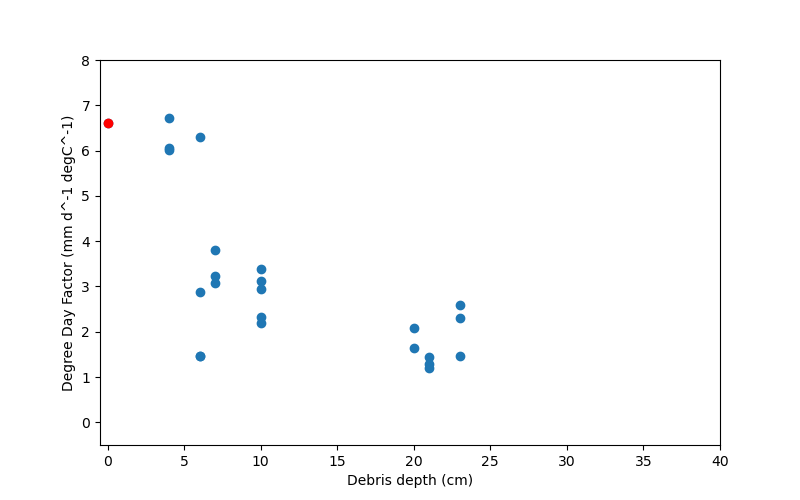

In [3]:
## SELECT AND PLOT JUST THE ACTUAL DATA

fig,ax=plt.subplots(figsize=(8,5))
# add my DDF for clean ice
s_row=pd.Series(['Loso clean ice',0,np.NaN,6.60,'Loso'],index=wb.columns)
wb=wb.append(s_row,ignore_index=True)

#make scatter of data
plt.scatter(wb['Debris Thickness'],wb['DDF'])
plt.xlabel('Debris depth (cm)')
plt.ylabel('Degree Day Factor (mm d^-1 degC^-1)')
# plot my clean ice dot over the existing dot for emphasis
plt.plot(0,6.60,color='red',marker='o')
plt.xlim(-0.5,40)
plt.ylim(-0.5,8)
plt.show()


[6.34412095 0.12500938 1.23438531]
[[ 1.75588204  0.01355468 -0.3974579 ]
 [ 0.01355468  0.00390858  0.05123671]
 [-0.3974579   0.05123671  0.95798692]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
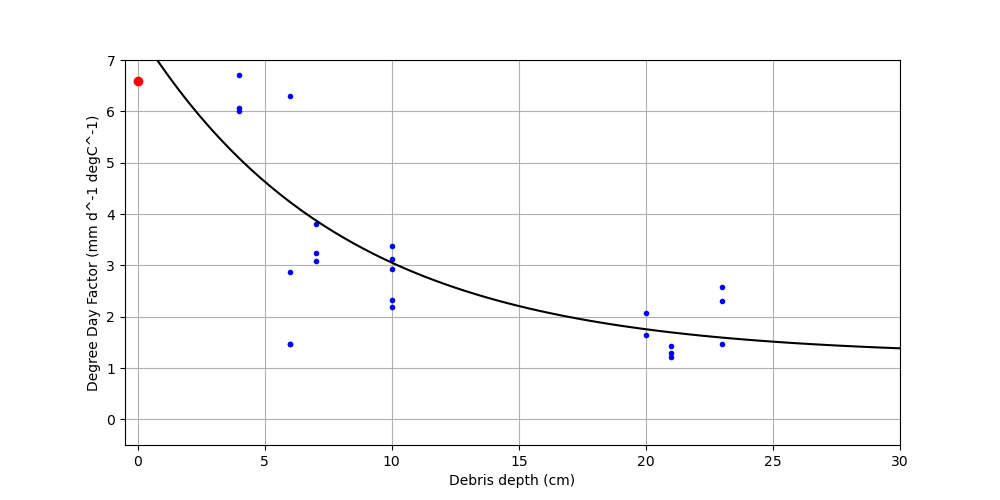

In [4]:
## FIT EQUATION

x=wb['Debris Thickness'].to_numpy()
y=wb['DDF'].to_numpy()
x=np.asarray(x)
y=np.asarray(y)

# define nice line for plotting fit
xfit=np.linspace(0,40,100)

def func(x,a,c,d):
# alternate form omitting constant 'd'
# def func(x,a,c):
    return a*np.exp(-c*x)+d
    # alternate form omitting a constant 'd'
    # return a*np.exp(-c*x)
popt,pcov=curve_fit(func,x,y,p0=(5,1e-6,0.5))
# alternate form omitting constant 'd'
# popt,pcov=curve_fit(func,x,y,p0=(5,1e-6))
print(popt)
print(pcov)

# use fit parameters to get ys
yy=func(xfit,*popt)
# the equation below is the fitted version with no parameter 'd'
# yy=6.4669*np.exp(-.08150151*xfit)
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'b.')
plt.plot(xfit,yy,'k-')
# plot my clean ice dot over the existing dot for emphasis
plt.plot(0,6.60,color='red',marker='o')
#make line of his fitted line
# plt.plot(curve['debrisdepth(cm)'],curve['DDF(mm/dC)'],color='red')
plt.xlabel('Debris depth (cm)')
plt.ylabel('Degree Day Factor (mm d^-1 degC^-1)')
plt.xlim(-0.5,30)
plt.grid()
plt.ylim(-0.5,7)
plt.show()

## SUMMARY

I fit a negative exponential equation to Cameron's 2020 data. As shown above, his data are in blue, except that I added the point at zero thickness, based on my DDF for clean ice. It seems to fit well. I didn't plot Cameron's curve. The equation for my curve is:

DDF=a*e^(-cx)+d where a is 5.93712, c is -0.10651, and d is 1.06660, which you can code as y=5.93712*np.exp(-0.10651*x)+1.06660.  NOTE THAT X IS units CM